<a href="https://colab.research.google.com/github/muthonioprah/Autolib-electric-car-sharing-service/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_01_Oprah_Muthoni_PythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Understanding:**

Autolib electric car sharing company is seeking insight on their electric car usage. Data collected was derived from the usage of their three cars the BlueCars, Utilib, Utilib 14 between January and June for different postal codes in Paris

**The research Question:**

To identify whether the number of Bluecars taken in postal code 75015 is more than the number of Bluecars taken in postal code 75017 on the weekends

**Success Metric:**

Coming up with a conclusion to our hypothesis.


In [239]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [188]:
# Loading the dataset
#
df=pd.read_csv('/content/autolib_daily_events_postal_code.csv')
#View the first five rows
# 
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## **DATA UNDERSTANDING**

In [189]:
# Checking number of rows and columns in our dataframe
#
df.shape

(16085, 13)

>The dataset has 16,085 rows and 13 columns








In [190]:
#getting information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [191]:
#to generate descriptive statistics of the DataFrame
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [192]:
#checking for any duplicate values
#
df.duplicated().any()

False

## **DATA CLEANING**

In [193]:
#check the number of missing values in each column
#
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [194]:
#checking the columns in our dataset
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [195]:
#renaming the column to remove the space between the words used
df.rename(columns={'Postal code':'Postal_code'}, inplace = True)

In [196]:
#checking the renamed columns
df.columns

Index(['Postal_code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [197]:
#checking for null values 
df.isnull()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,False,False,False,False,False,False,False,False,False,False,False,False,False
16081,False,False,False,False,False,False,False,False,False,False,False,False,False
16082,False,False,False,False,False,False,False,False,False,False,False,False,False
16083,False,False,False,False,False,False,False,False,False,False,False,False,False


In [198]:
# Check for anomalies
# Let's confirm the unique values in each of our columns
#

postal_unique = len(pd.unique(df['Postal_code']))
print("No.of.unique values in the postal column :", postal_unique)
##
date_unique = len(pd.unique(df['date']))
print("No.of.unique values in the date column :", date_unique)
##
daily_data_unique = len(pd.unique(df['n_daily_data_points']))
print("No.of.unique values in daily data column :", daily_data_unique)
##
day_type_unique = len(pd.unique(df['day_type']))
print("No.of.unique values in the day type column :", day_type_unique)
##
dayOfWeek_unique = len(pd.unique(df['dayOfWeek']))
print("No.of.unique values in the day column :", dayOfWeek_unique)
##
blue_taken_unique = len(pd.unique(df['BlueCars_taken_sum']))
print("No.of.unique values in the BlueCars_taken_sum column :", blue_taken_unique)
##
blue_returned_unique = len(pd.unique(df['BlueCars_returned_sum']))
print("No.of.unique values in the BlueCars_return_sum column :", blue_returned_unique)
##
utilib_taken_unique = len(pd.unique(df['Utilib_taken_sum']))
print("No.of.unique values in the Utlib_taken_sum column :",utilib_taken_unique)
##
utilib_returned_unique = len(pd.unique(df['Utilib_returned_sum']))
print("No.of.unique values in the Utlib_returned_sum column :", utilib_returned_unique)
##
utilib_14_taken_unique = len(pd.unique(df['Utilib_14_taken_sum']))
print("No.of.unique values in the Utilib_14_taken_sum column :", utilib_14_taken_unique)
##
utilib_14_returned_unique = len(pd.unique(df['Utilib_14_returned_sum']))
print("No.of.unique values in the Utilib_14_returned_sum column :", utilib_14_returned_unique)
##
slots_freed_unique = len(pd.unique(df['Slots_freed_sum']))
print("No.of.unique values in the Slots_freed_sum column :", slots_freed_unique)
##
slots_taken_unique = len(pd.unique(df['Slots_taken_sum']))
print("No.of.unique values in the Slots_taken_sum column :", slots_taken_unique)

No.of.unique values in the postal column : 104
No.of.unique values in the date column : 156
No.of.unique values in daily data column : 23
No.of.unique values in the day type column : 2
No.of.unique values in the day column : 7
No.of.unique values in the BlueCars_taken_sum column : 932
No.of.unique values in the BlueCars_return_sum column : 929
No.of.unique values in the Utlib_taken_sum column : 48
No.of.unique values in the Utlib_returned_sum column : 49
No.of.unique values in the Utilib_14_taken_sum column : 92
No.of.unique values in the Utilib_14_returned_sum column : 94
No.of.unique values in the Slots_freed_sum column : 297
No.of.unique values in the Slots_taken_sum column : 301


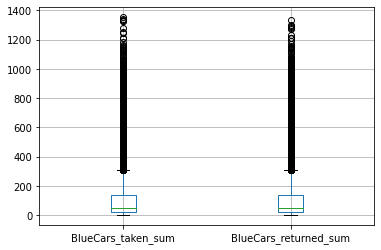

In [199]:
#checking for outliers
df.boxplot(column = ['BlueCars_taken_sum', 'BlueCars_returned_sum'])

The outliers were not dropped since they represent real time data which if removed will affect the data analysis.

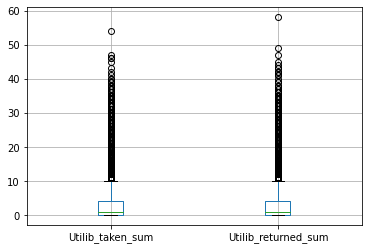

In [200]:
#checking for outliers
df.boxplot(column = ['Utilib_taken_sum', 'Utilib_returned_sum'])

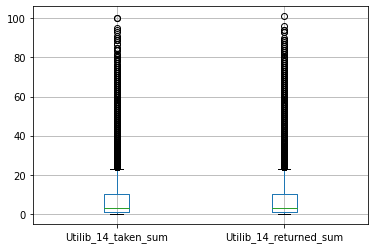

In [201]:
#checking for outliers
df.boxplot(column = ['Utilib_14_taken_sum', 'Utilib_14_returned_sum'])

# **DATA ANALYSIS**

### **1. UNIVARIATE ANALSIS**

### **Measures of Central Tendancy**



In [202]:
#finding the population mean 
#
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  y = df[i].mean()
  print('The mean of ', i,'is ', y)

The mean of  BlueCars_taken_sum is  125.92695057506994
The mean of  BlueCars_returned_sum is  125.912713708424
The mean of  Utilib_taken_sum is  3.69829033260802
The mean of  Utilib_returned_sum is  3.6990985390115014
The mean of  Utilib_14_taken_sum is  8.600559527510102
The mean of  Utilib_14_returned_sum is  8.599191793596518
The mean of  Slots_freed_sum is  22.62903326080199
The mean of  Slots_taken_sum is  22.629281939695367


In [203]:
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  y = df[i].mode()
  print('The mode of', i,'is', y)

The mode of BlueCars_taken_sum is 0    12
dtype: int64
The mode of BlueCars_returned_sum is 0    13
dtype: int64
The mode of Utilib_taken_sum is 0    0
dtype: int64
The mode of Utilib_returned_sum is 0    0
dtype: int64
The mode of Utilib_14_taken_sum is 0    0
dtype: int64
The mode of Utilib_14_returned_sum is 0    0
dtype: int64
The mode of Slots_freed_sum is 0    0
dtype: int64
The mode of Slots_taken_sum is 0    0
dtype: int64


In [204]:
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  y = df[i].median()
  print('The median of', i,'is', y)

The median of BlueCars_taken_sum is 46.0
The median of BlueCars_returned_sum is 46.0
The median of Utilib_taken_sum is 1.0
The median of Utilib_returned_sum is 1.0
The median of Utilib_14_taken_sum is 3.0
The median of Utilib_14_returned_sum is 3.0
The median of Slots_freed_sum is 0.0
The median of Slots_taken_sum is 0.0


## **Measures of Dispersion/Variability**

### **Standard Deviation**

In [205]:
#Standard Deviation
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  y = df[i].std()
  print('The Standard Deviation of', i,'is', y)

The Standard Deviation of BlueCars_taken_sum is 185.42657876727893
The Standard Deviation of BlueCars_returned_sum is 185.50153480148427
The Standard Deviation of Utilib_taken_sum is 5.815057779367249
The Standard Deviation of Utilib_returned_sum is 5.824634228651658
The Standard Deviation of Utilib_14_taken_sum is 12.870098297095637
The Standard Deviation of Utilib_14_returned_sum is 12.868992936610336
The Standard Deviation of Slots_freed_sum is 52.12026333757879
The Standard Deviation of Slots_taken_sum is 52.146029870452566


### **Variance**

In [206]:
#Variance
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  y = df[i].var()
  print('The Standard Deviation of', i,'is', y)

The Standard Deviation of BlueCars_taken_sum is 34383.01611333789
The Standard Deviation of BlueCars_returned_sum is 34410.819413706275
The Standard Deviation of Utilib_taken_sum is 33.81489697737956
The Standard Deviation of Utilib_returned_sum is 33.9263638975805
The Standard Deviation of Utilib_14_taken_sum is 165.63943017690403
The Standard Deviation of Utilib_14_returned_sum is 165.61097920252672
The Standard Deviation of Slots_freed_sum is 2716.52185037856
The Standard Deviation of Slots_taken_sum is 2719.2084312501315


### **Range**

In [207]:

# Range
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  range = df[i].max() - df[i].min()
  print('The range of',i, 'is', range )

The range of BlueCars_taken_sum is 1352
The range of BlueCars_returned_sum is 1332
The range of Utilib_taken_sum is 54
The range of Utilib_returned_sum is 58
The range of Utilib_14_taken_sum is 100
The range of Utilib_14_returned_sum is 101
The range of Slots_freed_sum is 360
The range of Slots_taken_sum is 359


### **Quantiles**

In [208]:
# Quatiles
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  quantile = df[i].quantile([0.25,0.5,0.75])
  print('The range of',i, 'is', quantile )


The range of BlueCars_taken_sum is 0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64
The range of BlueCars_returned_sum is 0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64
The range of Utilib_taken_sum is 0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_taken_sum, dtype: float64
The range of Utilib_returned_sum is 0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_returned_sum, dtype: float64
The range of Utilib_14_taken_sum is 0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_taken_sum, dtype: float64
The range of Utilib_14_returned_sum is 0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_returned_sum, dtype: float64
The range of Slots_freed_sum is 0.25    0.0
0.50    0.0
0.75    5.0
Name: Slots_freed_sum, dtype: float64
The range of Slots_taken_sum is 0.25    0.0
0.50    0.0
0.75    5.0
Name: Slots_taken_sum, dtype: float64


### **Kurtosis**

In [209]:
# Kurtosis
#
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  kurtosis = df[i].kurt()
  print('The skewness of',i, 'is', kurtosis)

The skewness of BlueCars_taken_sum is 6.172692305510042
The skewness of BlueCars_returned_sum is 6.1862880957582345
The skewness of Utilib_taken_sum is 7.702361895243428
The skewness of Utilib_returned_sum is 7.93635700780893
The skewness of Utilib_14_taken_sum is 7.18681525579947
The skewness of Utilib_14_returned_sum is 7.18546312191963
The skewness of Slots_freed_sum is 6.454514382612528
The skewness of Slots_taken_sum is 6.442553073772169


### **Skewness**

In [210]:
#Skewness
x =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
for i in x:
  skewness = df[i].skew()
  print('The skewness of',i, 'is', skewness)

The skewness of BlueCars_taken_sum is 2.4063548974959086
The skewness of BlueCars_returned_sum is 2.412084978838923
The skewness of Utilib_taken_sum is 2.5568719194754777
The skewness of Utilib_returned_sum is 2.57866477971619
The skewness of Utilib_14_taken_sum is 2.5109244534822923
The skewness of Utilib_14_returned_sum is 2.511487901149739
The skewness of Slots_freed_sum is 2.5974057870090994
The skewness of Slots_taken_sum is 2.5969043474634987


### **Histogram**

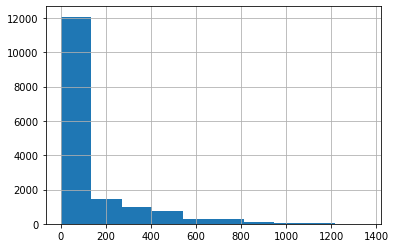

In [211]:
df['BlueCars_taken_sum'].hist()

>Shows the data is positively skewed.







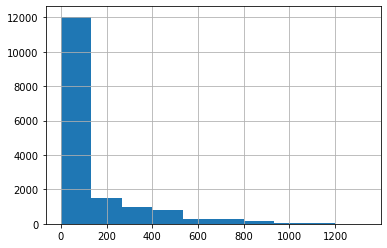

In [212]:
df['BlueCars_returned_sum'].hist()

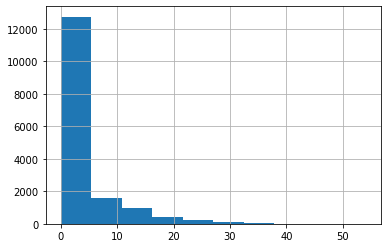

In [213]:
df['Utilib_taken_sum'].hist()

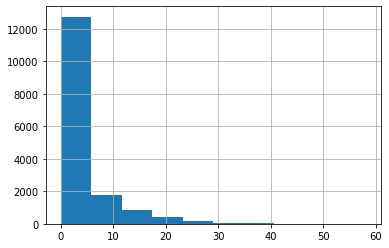

In [214]:
df['Utilib_returned_sum'].hist()

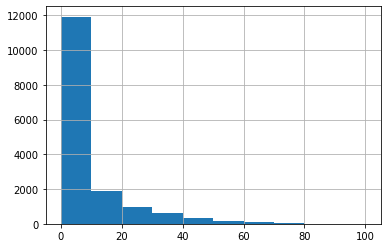

In [215]:
df['Utilib_14_taken_sum'].hist()

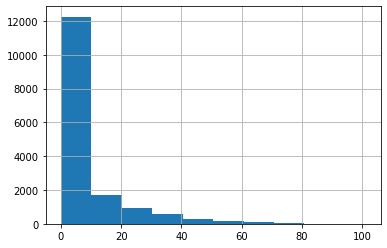

In [216]:
df['Utilib_14_returned_sum'].hist()

>Shows the data is positively skewed.

# **BIVARIATE ANALYSIS**

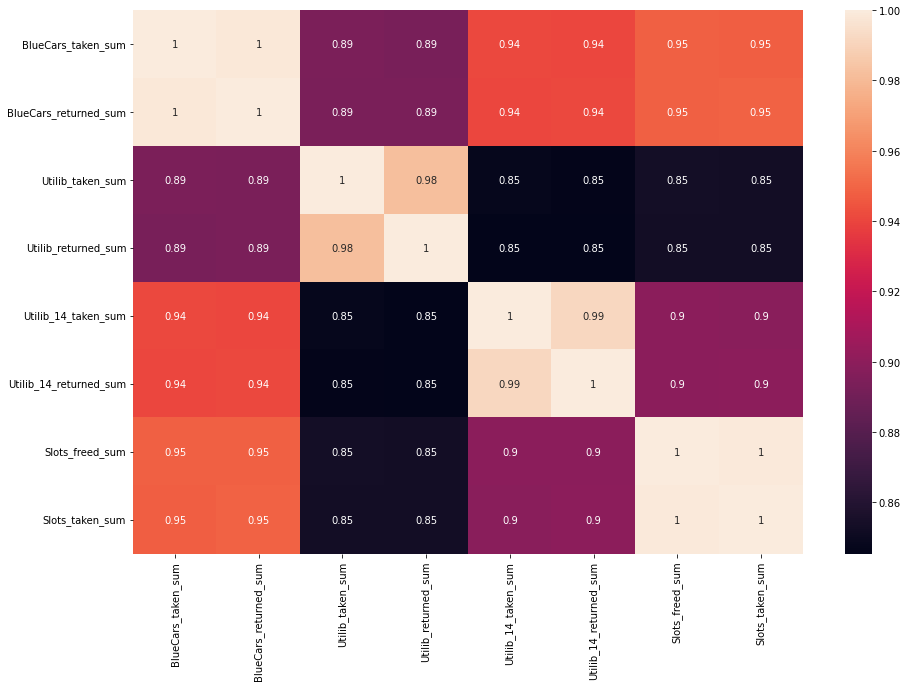

In [217]:
import seaborn as sns
y =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
corr = df[y].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True)

The variables have a positive correlation

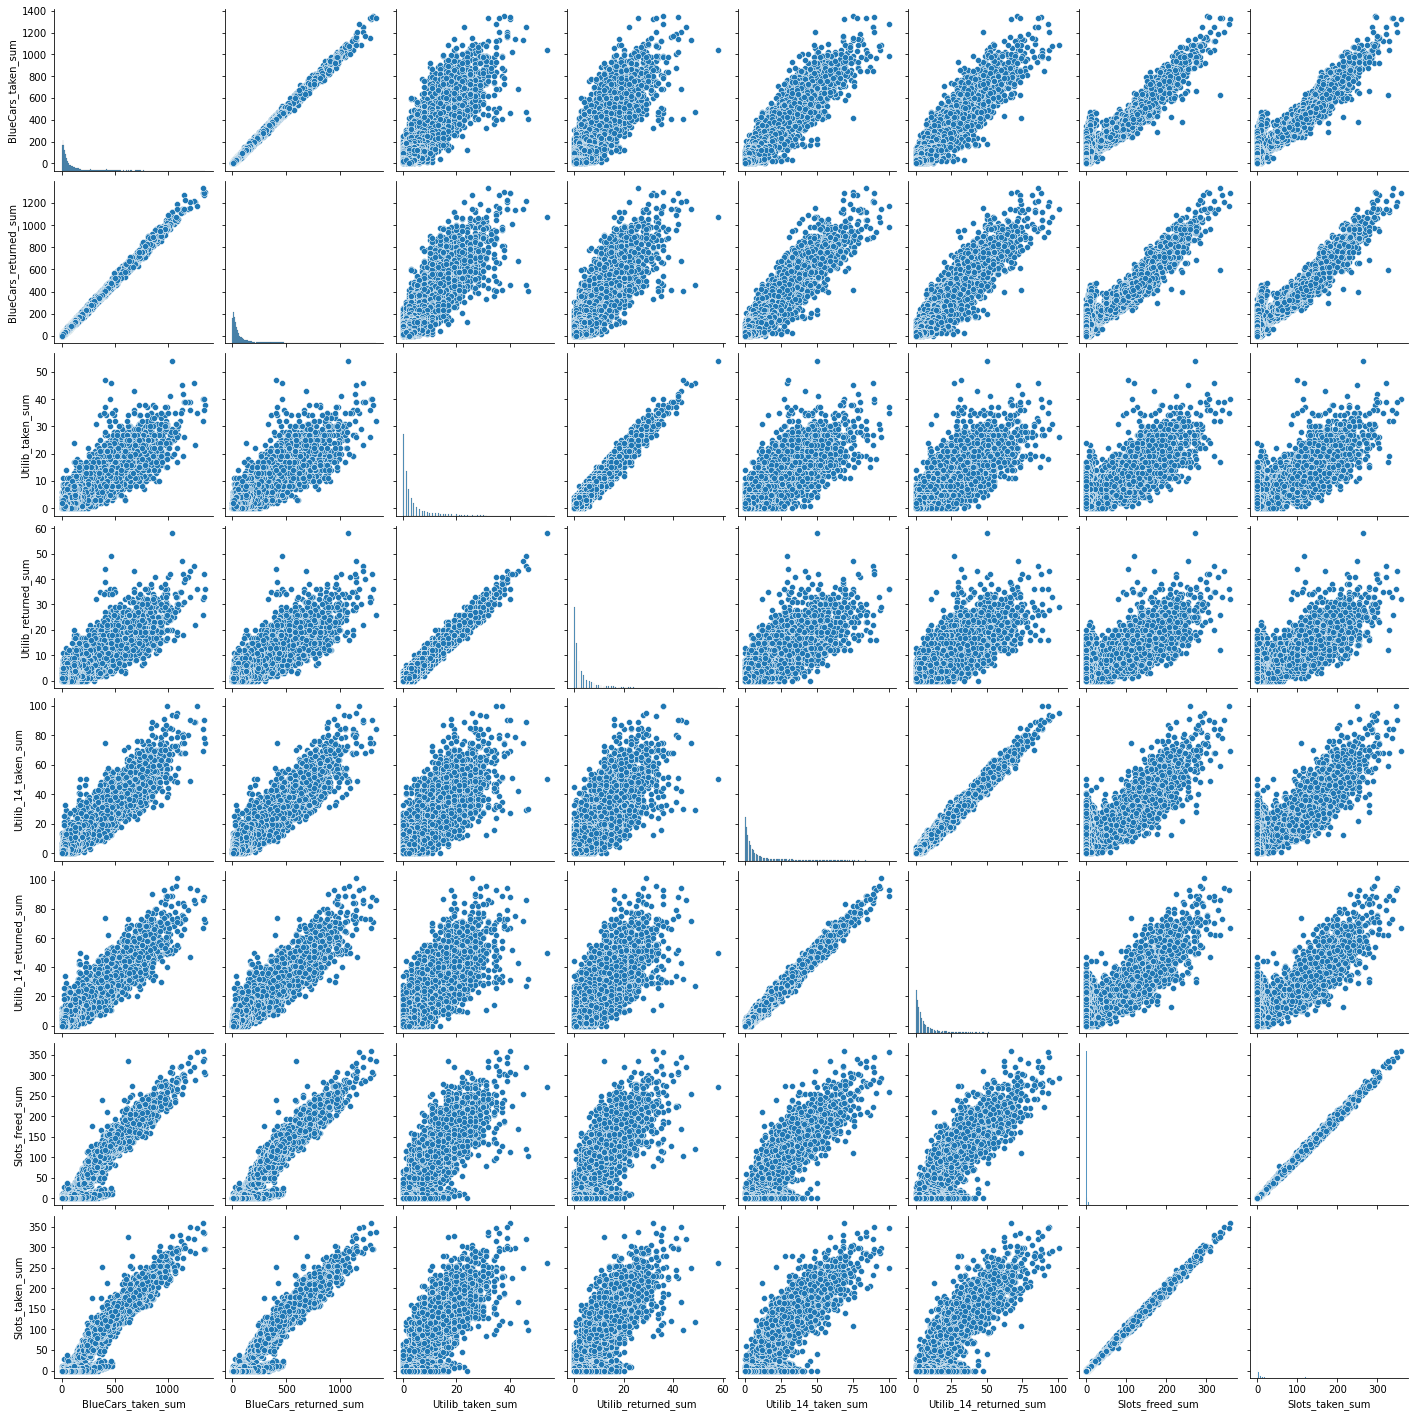

In [218]:
# Scatter plots
#
y =['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
sns.pairplot(df[y])

# **Hypothesis testing**

**Null hypothesis**: The number Bluecars taken from postal code 75015 are the same as the number of Bluecars taken from postal code 75017 on weekends

**Alternative hypothesis**: The number Bluecars taken from postal code 75015 are more than the number of Bluecars taken from postal code 75017 on weekends

The level of significance is 0.05

In [219]:
#narrowing down the data to only weekend car hires
df_weekend = df[df['day_type']=='weekend']
df_weekend.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39


In [233]:
##Narrowing dow the data to car hires from our selected postal code 75015
#
df_post1 = df_weekend[(df_weekend['Postal_code']== 75015)]
df_post1.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2189,75015,1/6/2018,1437,5,weekend,1061,1015,25,25,72,68,253,245
2190,75015,1/7/2018,1440,6,weekend,913,971,27,29,53,56,215,214
2196,75015,1/13/2018,1440,5,weekend,1255,1211,23,22,89,84,289,287
2197,75015,1/14/2018,1440,6,weekend,1097,1135,27,28,82,84,286,286
2203,75015,1/20/2018,1439,5,weekend,1352,1300,38,36,75,71,302,295


In [231]:
df_post1.shape

(44, 13)

In [232]:
# random sample
#at least 70% of observations
df_sample1 = df_post1.sample(n = 30)
df_sample1.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2271,75015,4/1/2018,1440,6,weekend,939,979,21,21,69,69,236,240
2250,75015,3/11/2018,1440,6,weekend,1038,1119,27,28,67,73,271,284
2292,75015,4/22/2018,1440,6,weekend,925,979,24,28,45,49,222,231
2330,75015,6/10/2018,1440,6,weekend,1087,1143,26,29,95,101,293,298
2316,75015,5/27/2018,1440,6,weekend,1152,1271,26,31,75,82,292,305


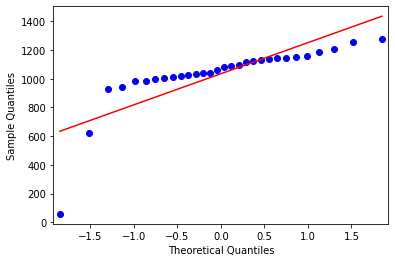

In [244]:
#totest the distribution of the observations
# q-q plot
qqplot(df_sample1['BlueCars_taken_sum'], line='s')
pyplot.show()

Sample looks Gaussian

In [234]:
#Narrowing dow the data to car hires from our selected postal codes 75017
df_post2 = df_weekend[(df_weekend['Postal_code']== 75017)]
df_post2.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2501,75017,1/6/2018,1437,5,weekend,928,904,18,15,48,47,223,219
2502,75017,1/7/2018,1440,6,weekend,795,846,11,13,38,40,200,206
2508,75017,1/13/2018,1440,5,weekend,992,987,18,20,58,56,245,245
2509,75017,1/14/2018,1440,6,weekend,890,963,17,17,56,64,203,215
2515,75017,1/20/2018,1439,5,weekend,945,939,17,23,42,44,253,255


In [236]:
df_post2.shape

(44, 13)

In [237]:
# random sample
#at least 70% of observations
df_sample2 = df_post2.sample(n = 33)
df_sample2.head()

,Postal_code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2575,75017,3/24/2018,1440,5,weekend,985,979,31,33,54,55,237,234
2590,75017,4/8/2018,1440,6,weekend,936,975,31,30,63,55,224,228
2544,75017,2/18/2018,1438,6,weekend,795,845,24,24,45,45,205,210
2554,75017,3/3/2018,1440,5,weekend,872,864,27,33,56,53,270,276
2576,75017,3/25/2018,1380,6,weekend,753,831,25,24,56,52,215,222


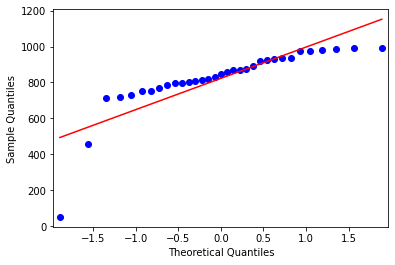

In [245]:
#totest the distribution of the observations
# q-q plot
qqplot(df_sample2['BlueCars_taken_sum'], line='s')
pyplot.show()

Sample looks Gaussian

In [249]:
#performing a 2-tailed z-test since our sample sizes in both cases are>30

pop_mean1 = df_post1['BlueCars_taken_sum'].mean()
print('The first population mean is ', pop_mean1)
#
pop_mean2 = df_post2['BlueCars_taken_sum'].mean()
print('The second population mean is ', pop_mean2)
#

The first population mean is  1072.7727272727273
The second population mean is  831.0227272727273


In [248]:
#
sample_mean1 = df_sample1['BlueCars_taken_sum'].mean()
print('The first sample mean is ', sample_mean1)
#
sample_mean2 =df_sample2['BlueCars_taken_sum'].mean()
print('The second sample mean 2 is ', sample_mean2)
#

The first sample mean is  1034.8333333333333
The second sample mean 2 is  822.6060606060606


In [250]:
#
pop_dev1 = df_post1['BlueCars_taken_sum'].std()
print('The second population SD is ', pop_dev1)
#
pop_dev2 = df_post2['BlueCars_taken_sum'].std()
print('The second population SD is ', pop_dev2)


The second population SD is  211.90913625796864
The second population SD is  159.84345374151835


In [252]:
# Finding the Zscore
# 
import math 
numerator = sample_mean1 - sample_mean2
denominator = (pop_dev1**2)/30 + (pop_dev2**2)/33
denominator_sqrt = math.sqrt(denominator)
zscore = numerator/denominator_sqrt
zscore

4.453321503472084

In [253]:
#Since we are trying to prove that
#The number Bluecars taken from postal code 75015 are more than the number of Bluecars taken from postal code 75017 on weekends
# We will perform a right tailed test
# Calculating our p-value
#
import scipy.stats
# Find the p-value
scipy.stats.norm.sf(abs(zscore))

4.227600099411292e-06

Since the P-Value is less than our confidence level of 0.05, we will reject the null hypothesis